## Implement Convolutional Neural Networks from scratch for colour images

I am using the CIFAR10 dataset for the image classification and it has 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
Details of this dataset can be found here:
https://en.wikipedia.org/wiki/CIFAR-10    
http://www.cs.toronto.edu/~kriz/cifar.html

## Load the data and plot first few images

Shape of Train dataset is: X=(50000, 32, 32, 3), y=(50000, 1)
Shape of Test dataset is: X=(10000, 32, 32, 3), y=(10000, 1)


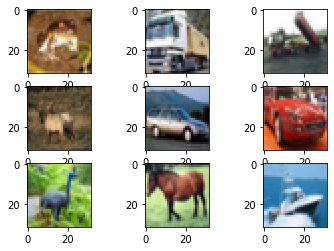

In [92]:
# As the size of the dataset is 163 MB, I am using the keras API for just loading purpose of the dataset
# and data is in batches like data_batch1,data_batch2,....,data_batch5 and test_batch.
# if keras in not installed then install it using !pip install keras and it is also has a dependency on tensorflow 2.3, So, better to install tensorflow also using !pip install tensorflow But I am not using it here. 
# Later for training, I will not use keras
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt
# Splitting the dataset into train and test 
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
print('Shape of Train dataset is: X=%s, y=%s' % (train_X.shape, train_Y.shape))
print('Shape of Test dataset is: X=%s, y=%s' % (test_X.shape, test_Y.shape))
# plot some images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i])
    
pyplot.show()

#First time, It might take 20-30 minutes due to huge size of dataset

In [93]:
# Here, training dataset contains total 50,000 images, each of 32*32 pixels in RGB color format(3 channels) 
# and test dataset has 10,000 images with same specifications as training dataset
# pixel values for each image in the dataset are unsigned integers in the range
# between no color and full color, or 0 and 255.

In [94]:
print(train_Y.shape)

(50000, 1)


In [95]:
print(test_Y.shape)

(10000, 1)


# Data Preprocessing

In [96]:
# Here, we have total 10 classes (integers 0 to 9 for 10 classses) and so we can use one-hot encoding 
# to make 10 element binary vector with a 1 for the index of the class value
vect = np.zeros((50000, 10)) # creating a 50000*10 size matrix 

for i in range(50000):
    vect[i, train_Y[i]] = 1

In [97]:
print(vect.shape)

(50000, 10)


In [98]:
print(vect)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [99]:
train_Y = vect

In [100]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [101]:
vect1 = np.zeros((10000, 10)) # creating a 10000*10 size matrix 

for i in range(10000):
    vect1[i, test_Y[i]] = 1

In [102]:
test_Y=vect1

In [103]:
print(test_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [104]:
# Now, I will normalize the pixel values i.e. to rescale the pixel values between 0 and 1
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [105]:
print(train_norm)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [106]:
print(test_norm)

[[[[0.61960787 0.4392157  0.19215687]
   [0.62352943 0.43529412 0.18431373]
   [0.64705884 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254903 0.14117648]
   [0.49411765 0.35686275 0.14117648]
   [0.45490196 0.33333334 0.12941177]]

  [[0.59607846 0.4392157  0.2       ]
   [0.5921569  0.43137255 0.15686275]
   [0.62352943 0.44705883 0.1764706 ]
   ...
   [0.53333336 0.37254903 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509805 0.13333334]]

  [[0.5921569  0.43137255 0.18431373]
   [0.5921569  0.42745098 0.12941177]
   [0.61960787 0.43529412 0.14117648]
   ...
   [0.54509807 0.38431373 0.13333334]
   [0.50980395 0.37254903 0.13333334]
   [0.47058824 0.34901962 0.12941177]]

  ...

  [[0.26666668 0.4862745  0.69411767]
   [0.16470589 0.39215687 0.5803922 ]
   [0.12156863 0.34509805 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254905]
   [0.05098039 0.2509804  0.42352942]
   [0.15686275 0.33333334 0.49803922]]

  [[0.23921569 0.45490196 0.65882355]
   [0.1

# Model Implementation

## Convolutional Neural Network Model (CNN) for an image

Here, first, I will show how CNN works by using an image of cat and then implement the CNN for the above dataset.
Here, I will create three layers which are convolution (conv for short), ReLU, and max pooling. The major steps involved are as follows:

    1) Reading the input image and prepare the filters.
    2) conv layer: Convolving each filter with the input image.
    3) ReLU layer: Applying ReLU activation function on the feature maps (output of conv layer).
    4) Max Pooling layer: Applying the pooling operation on the output of ReLU layer.

In [107]:
# Here, I use an already existing image from the skimage Python library and converts it into gray
import skimage.data    
image = skimage.data.chelsea()  

In [108]:
print(image.shape)

(300, 451, 3)


In [109]:
print(image)

[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]


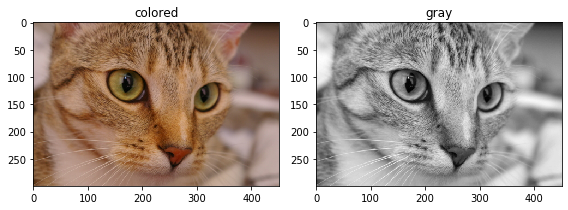

In [110]:
image1 = skimage.color.rgb2gray(image) # Converting the image into gray.
figure, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("colored")
ax[1].imshow(image1, cmap=plt.cm.gray)
ax[1].set_title("gray")

figure.tight_layout()
plt.show()

In [111]:
print(image1.shape)

(300, 451)


In [112]:
print(image.shape)

(300, 451, 3)


In [113]:
# Now, I will prepare the filters
import numpy as np
layer1_filter = np.zeros((2,3,3)) # filter for first convolutional layer
#Here, according to the number of filters and the size of each filter, a zero array will be created. 
#(2,3,3) means 2 filters of size 3x3 are created. 

# I have not taken the depth in the filter means size of filter is 2D array because here, I am considering
# gray image which is named "image1" and if suppose, we have to take colored image which is named "image" here
# Then I have to intrduce depth also means then 3 channels will be there for RGB
# and in that case, I have to define the filter size as (3,3,3)

In [114]:
# Now, to detect vertical and horizontal edges, so I have created the arrays below
layer1_filter[0, :, :] = np.array([[[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]])  
layer1_filter[1, :, :] = np.array([[[1,   1,  1],[0,   0,  0],[-1, -1, -1]]]) 

In [115]:
print(layer1_filter)

[[[-1.  0.  1.]
  [-1.  0.  1.]
  [-1.  0.  1.]]

 [[ 1.  1.  1.]
  [ 0.  0.  0.]
  [-1. -1. -1.]]]


## 1) Convolutional Layer

In [116]:
# After preparing the filters, next step is to convolve the input image i.e. "image1" by filter.
# So, for that I have to define the convolve() function as:
import numpy
import sys
def convolution(image, convolution_filter):
    filter_size = convolution_filter.shape[1]
    result = numpy.zeros((image.shape))
    for i in numpy.uint16(numpy.arange(filter_size/2.0, 
                          image.shape[0]-filter_size/2.0+1)):
        for j in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           image.shape[1]-filter_size/2.0+1)):
            current_region = image[i-numpy.uint16(numpy.floor(filter_size/2.0)):i+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              j-numpy.uint16(numpy.floor(filter_size/2.0)):j+numpy.uint16(numpy.ceil(filter_size/2.0))]
            current_result = current_region * convolution_filter
            convolution_sum = numpy.sum(current_result)
            result[i, j] = convolution_sum
            
    result1 = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return result1

In [117]:
def convolve(image, convolve_filter):

    if len(image.shape) != len(convolve_filter.shape) - 1: 
        print("Number of dimensions in convolve filter and image do not match.")  
        exit()
    if len(image.shape) > 2 or len(convolve_filter.shape) > 3:
        if image.shape[-1] != convolve_filter.shape[-1]:
            print("Number of channels in both image and filter must match.")
            sys.exit()
    if convolve_filter.shape[1] != convolve_filter.shape[2]:
        print('Filter must be a square matrix.')
        sys.exit()
    if convolve_filter.shape[1]%2==0:
        print('Filter must have an odd size(number of rows and columns must be odd).')
        sys.exit()
    feature_maps = numpy.zeros((image.shape[0]-convolve_filter.shape[1]+1, 
                                image.shape[1]-convolve_filter.shape[1]+1, 
                                convolve_filter.shape[0]))
    for filter_number in range(convolve_filter.shape[0]):
        print("Filter ", filter_number + 1)
        current_filter = convolve_filter[filter_number, :]
        if len(current_filter.shape) > 2:
            convolve_map = convolution(image[:, :, 0], current_filter[:, :, 0]) 
            for num in range(1, current_filter.shape[-1]):
                convolve_map = convolve_map + convolution(image[:, :, num], 
                                  current_filter[:, :, num])
        else:
            convolve_map = convolution(image, current_filter)
        feature_maps[:, :, filter_number] = convolve_map
    return feature_maps    

## 2) ReLU Layer

In [118]:
# Here, the ReLU layer applies the "ReLU" activation function for each feature map (filter 1 and filter 2)
#returned by the convolutional layer. 
def ReLU(feature_map):
    ReLU_out = numpy.zeros(feature_map.shape)
    for num in range(feature_map.shape[-1]):
        for i in numpy.arange(0,feature_map.shape[0]):
            for j in numpy.arange(0, feature_map.shape[1]):
                ReLU_out[i, j, num] = numpy.max([feature_map[i, j, num], 0])
    return ReLU_out

## 3) Max Pooling Layer

In [119]:
# It accepts the output of the ReLU layer and applies the max pooling operation 
def Pool(feature_map, size=2, stride=2):
    Pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride+1),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for num in range(feature_map.shape[-1]):
        i2 = 0
        for i in numpy.arange(0,feature_map.shape[0]-size+1, stride):
            j2 = 0
            for j in numpy.arange(0, feature_map.shape[1]-size+1, stride):
                Pool_out[i2, j2, num] = numpy.max([feature_map[i:i+size,  j:j+size, num]])
                j2 = j2 + 1
            i2 = i2 +1
    return Pool_out

## Result

In [120]:
import skimage.data
import numpy
#from matplotlib import pyplot

image1 = skimage.data.chelsea()
image1 = skimage.color.rgb2gray(image1)
layer1_filter = numpy.zeros((2,3,3))
layer1_filter[0, :, :] = numpy.array([[[-1, 0, 1], 
                                   [-1, 0, 1], 
                                   [-1, 0, 1]]])
layer1_filter[1, :, :] = numpy.array([[[1,   1,  1], 
                                   [0,   0,  0], 
                                   [-1, -1, -1]]])

print("\n**Working with convolution layer 1**")
layer1_feature_map = convolve(image1, layer1_filter)
print("\n**ReLU**")
layer1_feature_map_relu = ReLU(layer1_feature_map)
print("\n**Pooling**")
layer1_feature_map_relu_pool = Pool(layer1_feature_map_relu, 2, 2)
print("**End of conv layer 1**\n")
layer2_filter = numpy.random.rand(3, 5, 5, layer1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
layer2_feature_map = convolve(layer1_feature_map_relu_pool, layer2_filter)
print("\n**ReLU**")
layer2_feature_map_relu = ReLU(layer2_feature_map)
print("\n**Pooling**")
layer2_feature_map_relu_pool = Pool(layer2_feature_map_relu, 2, 2)
print("**End of conv layer 2**\n")
layer3_filter = numpy.random.rand(1, 7, 7, layer2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")
layer3_feature_map = convolve(layer2_feature_map_relu_pool, layer3_filter)
print("\n**ReLU**")
layer3_feature_map_relu = ReLU(layer3_feature_map)
print("\n**Pooling**")
layer3_feature_map_relu_pool = Pool(layer3_feature_map_relu, 2, 2)
print("**End of conv layer 3**\n")


**Working with convolution layer 1**
Filter  1
Filter  2

**ReLU**

**Pooling**
**End of conv layer 1**


**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**
**End of conv layer 2**


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**
**End of conv layer 3**



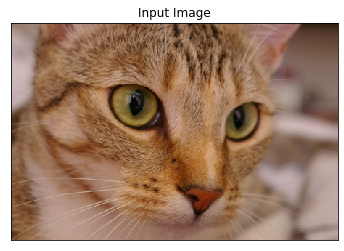

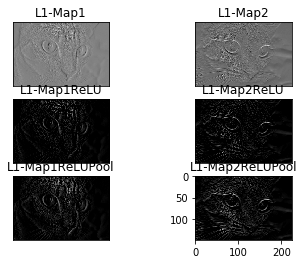

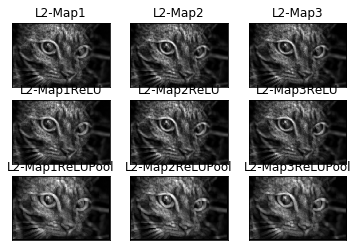

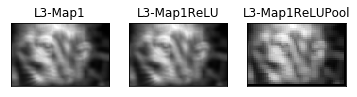

In [121]:
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(image).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.savefig("in_img.png", bbox_inches="tight")
fig1, ax1 = plt.subplots(nrows=3, ncols=2)
ax1[0, 0].imshow(layer1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")
ax1[0, 1].imshow(layer1_feature_map[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")
ax1[1, 0].imshow(layer1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")
ax1[1, 1].imshow(layer1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")
ax1[2, 0].imshow(layer1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")
ax1[2, 1].imshow(layer1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")
plt.savefig("L1.png", bbox_inches="tight")
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(layer2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")
ax2[0, 1].imshow(layer2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")
ax2[0, 2].imshow(layer2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")
ax2[1, 0].imshow(layer2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")
ax2[1, 1].imshow(layer2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")
ax2[1, 2].imshow(layer2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")
ax2[2, 0].imshow(layer2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")
ax2[2, 1].imshow(layer2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")
ax2[2, 2].imshow(layer2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")
plt.savefig("L2.png", bbox_inches="tight")
fig3, ax3 = plt.subplots(nrows=1, ncols=3)
ax3[0].imshow(layer3_feature_map[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")
ax3[1].imshow(layer3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")
ax3[2].imshow(layer3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")
plt.savefig("L3.png", bbox_inches="tight")

## Since, now we have basic understanding of the implementation of CNN, so, now we can use the CIFAR10 dataset. 

In [122]:
import pickle as cPickle
import numpy as np
import gzip
def arg_max(o):
    id1 = np.argmax(o, axis=None)
    multi_id1 = np.unravel_index(id1, o.shape)
    if np.isnan(o[multi_id1]):
        count = np.sum(np.isnan(o))
        id1 = np.argpartition(o, -count-1, axis=None)[-count-1]
        multi_id1 = np.unravel_index(id1, o.shape)
    return multi_id1

In [123]:
def max_pool(X, f, s):
    (length, width, width) = X.shape
    pooling = np.zeros((length, int((width-f)/s+1),int((width-f)/s+1)))
    for j2 in range(0,length):
        i=0
        while(i<width):
            j=0
            while(j<width):
                pooling[j2,i//2,j//2] = np.max(X[j2,i:i+f,j:j+f])
                j+=s
            i+=s
    return pooling

def cost1(out,y):
    e_out = np.exp(out, dtype=np.float128)
    prob = e_out/sum(e_out)
    p = sum(y*prob)
    cost = -np.log(p)
    return cost,prob

In [124]:
def Conv_Net(image, label, filt1, filt2, bias1, bias2, theta3, bias3):
    (length, width, width) = image.shape
    length1 = len(filt1)
    length2 = len(filt2)
    ( _, f, f) = filt1[0].shape
    width1 = width-f+1
    width2 = width1-f+1
    conv_1 = np.zeros((length1,width1,width1))
    conv_2 = np.zeros((length2,width2,width2))

    for j2 in range(0,length1):
        for x in range(0,width1):
            for y in range(0,width1):
                conv_1[j2,x,y] = np.sum(image[:,x:x+f,y:y+f]*filt1[j2])+bias1[j2]
    conv_1[conv_1<=0] = 0
    for j2 in range(0,length2):
        for x in range(0,width2):
            for y in range(0,width2):
                conv_2[j2,x,y] = np.sum(conv_1[:,x:x+f,y:y+f]*filt2[j2])+bias2[j2]
    conv_2[conv_2<=0] = 0

    pooled_layer = max_pool(conv_2, 2, 2)

    fc_1 = pooled_layer.reshape(((width2//2)*(width2//2)*length2,1))
    out = theta3.dot(fc_1) + bias3
    cost, prob = cost1(out, label)
    if np.argmax(out)==np.argmax(label):
        accu=1
    else:
        accu=0
    d_out = prob - label
    d_theta3 = d_out.dot(fc_1.T)

    d_bias3 = sum(d_out.T).T.reshape((10,1))

    d_fc1 = theta3.T.dot(d_out)

    d_pool = d_fc1.T.reshape((length2, width2//2, width2//2))

    d_conv2 = np.zeros((length2, width2, width2))
    for j2 in range(0,length2):
        i=0
        while(i<width2):
            j=0
            while(j<width2):
                (a,b) = arg_max(conv_2[j2,i:i+2,j:j+2]) 
                d_conv2[j2,i+a,j+b] = d_pool[j2,i//2,j//2]
                j+=2
            i+=2
    d_conv2[conv_2<=0]=0
    d_conv1 = np.zeros((length1, width1, width1))
    d_filt2 = {}
    d_bias2 = {}
    for x2 in range(0,length2):
        d_filt2[x2] = np.zeros((length1,f,f))
        d_bias2[x2] = 0

    d_filt1 = {}
    d_bias1 = {}
    for x2 in range(0,length1):
        d_filt1[x2] = np.zeros((length,f,f))
        d_bias1[x2] = 0

    for j2 in range(0,length2):
        for x in range(0,width2):
            for y in range(0,width2):
                d_filt2[j2]+=d_conv2[j2,x,y]*conv_1[:,x:x+f,y:y+f]
                d_conv1[:,x:x+f,y:y+f]+=d_conv2[j2,x,y]*filt2[j2]
        d_bias2[j2] = np.sum(d_conv2[j2])
    d_conv1[conv_1<=0]=0
    for j2 in range(0,length1):
        for x in range(0,width1):
            for y in range(0,width1):
                d_filt1[j2]+=d_conv1[j2,x,y]*image[:,x:x+f,y:y+f]

        d_bias1[j2] = np.sum(d_conv1[j2])
    return [d_filt1, d_filt2, d_bias1, d_bias2, d_theta3, d_bias3, cost, accu]


In [125]:
def initialize_param(f, l):
     return 0.01*np.random.rand(l, f, f)

def initialize_theta(NUM_OUTPUT, l_in):
     return 0.01*np.random.rand(NUM_OUTPUT, l_in)

def initialise_param_normal(FILTER_SIZE, IMG_DEPTH, scale=1.0, distribution='normal'):
    if scale <= 0.:
            raise ValueError('scale should be a positive float number and Got:', scale)

    distribution = distribution.lower()
    if distribution not in {'normal'}:
        raise ValueError('Invalid distribution argument: '
                             'expected one of {"normal", "uniform"} '
                             'but got', distribution)
    scale = scale
    distribution = distribution
    fan_in = FILTER_SIZE*FILTER_SIZE*IMG_DEPTH
    scale = scale
    std_dev = scale * np.sqrt(1./fan_in)
    shape = (IMG_DEPTH,FILTER_SIZE,FILTER_SIZE)
    return np.random.normal(loc = 0,scale = std_dev,size = shape)


In [126]:
def momentum_Grad_Descent(batch, LEARNING_RATE, w, l, MU, filt1, filt2, bias1, bias2, theta3, bias3, cost, acc):
    X = batch[:,0:-1]
    X = X.reshape(len(batch), l, w, w)
    y = batch[:,-1]
    no_of_correct=0
    cost1 = 0
    batch_size = len(batch)
    d_filt2 = {}
    d_filt1 = {}
    d_bias2 = {}
    d_bias1 = {}
    v1 = {}
    v2 = {}
    bv1 = {}
    bv2 = {}
    for k in range(0,len(filt2)):
        d_filt2[k] = np.zeros(filt2[0].shape)
        d_bias2[k] = 0
        v2[k] = np.zeros(filt2[0].shape)
        bv2[k] = 0
    for k in range(0,len(filt1)):
        d_filt1[k] = np.zeros(filt1[0].shape)
        d_bias1[k] = 0
        v1[k] = np.zeros(filt1[0].shape)
        bv1[k] = 0
    d_theta3 = np.zeros(theta3.shape)
    d_bias3 = np.zeros(bias3.shape)
    v3 = np.zeros(theta3.shape)
    bv3 = np.zeros(bias3.shape)
    for i in range(0,batch_size):
        image = X[i]

        label = np.zeros((theta3.shape[0],1))
        label[int(y[i]),0] = 1
        [d_filt1_, d_filt2_, d_bias1_, d_bias2_, d_theta3_, d_bias3_, curr_cost, acc1] = Conv_Net(image, label, filt1, filt2, bias1, bias2, theta3, bias3)
        for j in range(0,len(filt2)):
            d_filt2[j]+=d_filt2_[j]
            d_bias2[j]+=d_bias2_[j]
        for j in range(0,len(filt1)):
            d_filt1[j]+=d_filt1_[j]
            d_bias1[j]+=d_bias1_[j]
        d_theta3+=d_theta3_
        d_bias3+=d_bias3_
        cost1+=curr_cost
        no_of_correct+=acc1

    for j in range(0,len(filt1)):
        v1[j] = MU*v1[j] -LEARNING_RATE*d_filt1[j]/batch_size
        filt1[j] += v1[j]
        bv1[j] = MU*bv1[j] -LEARNING_RATE*d_bias1[j]/batch_size
        bias1[j] += bv1[j]
    for j in range(0,len(filt2)):
        v2[j] = MU*v2[j] -LEARNING_RATE*d_filt2[j]/batch_size
        filt2[j] += v2[j]
        bv2[j] = MU*bv2[j] -LEARNING_RATE*d_bias2[j]/batch_size
        bias2[j] += bv2[j]
    v3 = MU*v3 - LEARNING_RATE*d_theta3/batch_size
    theta3 += v3
    bv3 = MU*bv3 -LEARNING_RATE*d_bias3/batch_size
    bias3 += bv3
    cost1 = cost1/batch_size
    cost.append(cost1)
    accuracy = float(no_of_correct)/batch_size
    acc.append(accuracy)
    return [filt1, filt2, bias1, bias2, theta3, bias3, cost, acc]

In [127]:
def predict(image, label, filt1, filt2, bias1, bias2, theta3, bias3):
    (length,width,width)=image.shape
    (length1,f,f) = filt2[0].shape
    length2 = len(filt2)
    width1 = width-f+1
    width2 = width1-f+1
    conv1 = np.zeros((length1,width1,width1))
    conv2 = np.zeros((length2,width2,width2))
    for j2 in range(0,length1):
        for x in range(0,width1):
            for y in range(0,width1):
                conv1[j2,x,y] = np.sum(image[:,x:x+f,y:y+f]*filt1[j2])+bias1[j2]
    conv1[conv1<=0] = 0 
    for j2 in range(0,length2):
        for x in range(0,width2):
            for y in range(0,width2):
                conv2[j2,x,y] = np.sum(conv1[:,x:x+f,y:y+f]*filt2[j2])+bias2[j2]
    conv2[conv2<=0] = 0 
    pooled_layer = max_pool(conv2, 2, 2)	
    fc1 = pooled_layer.reshape(((width2//2)*(width2//2)*length2,1))
    out = theta3.dot(fc1) + bias3
    return np.argmax(out)

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo,encoding='latin1')
    return dict
def printTime(remtime):
    hrs = int(remtime)/3600
    mins = int((remtime/60-hrs*60))
    secs = int(remtime-mins*60-hrs*3600)
    print("########  "+str(hrs)+"Hrs "+str(mins)+"Mins "+str(secs)+"Secs remaining  ########")

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import scipy.io as sio
import random

NUM_OF_OUTPUT = 10
LEARNING_RATE = 0.01
IMG_WIDTH = 32
IMG_DEPTH = 3
FILTER_SIZE=5
NUM_FILT1 = 16
NUM_FILT2 = 16
BATCH_SIZE = 8
NUM_EPOCHS = 3
MU = 0.95
PICKLE_FILE = 'output.pickle'
data_dash = unpickle('data_batch_1')
X= data_dash['data']
X=np.array(X, dtype=np.float64)
X-= int(np.mean(X))
X/= int(np.std(X))
(m,n) = X.shape
y_dash = np.array(data_dash['labels']).reshape((m,1))
data = np.hstack((X,y_dash))
np.random.shuffle(data)

## Training :

In [129]:
train_data = data[0:int(len(data)*0.9),:]
test_data = data[-int(len(data)*0.1):,:]
NUM_IMAGES = train_data.shape[0]
filt1 = {}
filt2 = {}
bias1 = {}
bias2 = {}
for i in range(0,NUM_FILT1):
    filt1[i] = initialise_param_normal(FILTER_SIZE,IMG_DEPTH)
    bias1[i] = 0
for i in range(0,NUM_FILT2):
    filt2[i] = initialise_param_normal(FILTER_SIZE,NUM_FILT1)
    bias2[i] = 0
width1 = IMG_WIDTH-FILTER_SIZE+1
width2 = width1-FILTER_SIZE+1
theta3 = initialize_theta(NUM_OF_OUTPUT, int(width2/2.0*(width2/2.0)*NUM_FILT2))
bias3 = np.zeros((NUM_OF_OUTPUT,1))
cost = []
acc = []
print("Learning Rate:"+str(LEARNING_RATE)+", Batch Size:"+str(BATCH_SIZE))
for epoch in range(0,NUM_EPOCHS):
    np.random.shuffle(train_data)
    batches = [train_data[k:k + BATCH_SIZE] for k in range(0, NUM_IMAGES, BATCH_SIZE)]
    print(batches[0].shape)
    x=0
    for batch in batches:
        stime = time.time()
        out = momentum_Grad_Descent(batch, int(LEARNING_RATE), int(IMG_WIDTH), int(IMG_DEPTH),int(MU), filt1, filt2, bias1, bias2,theta3, bias3,cost,acc)
        [filt1, filt2, bias1, bias2, theta3, bias3, cost, acc] = out
        epoch_acc = round(np.sum(acc[epoch*NUM_IMAGES//BATCH_SIZE:])/(x+1),2)
        per = float(x+1)/len(batches)*100
        print("Epoch:"+str(round(per,2))+"% Of "+str(epoch+1)+"/"+str(NUM_EPOCHS)+", Cost:"+str(cost[-1])+", B.Acc:"+str(acc[-1]*100)+", E.Acc:"+str(epoch_acc))
        ftime = time.time()
        deltime = ftime-stime
        remtime = (len(batches)-x-1)*deltime+deltime*len(batches)*(NUM_EPOCHS-epoch-1)
        hrs = int(remtime)/3600
        mins = int((remtime/60-hrs*60))
        secs = int(remtime-mins*60-hrs*3600)
        print(str(int(deltime))+"secs/batch : ########  "+str(hrs)+"Hrs "+str(mins)+"Mins "+str(secs)+"Secs remaining  ########")
        x+=1
with open(PICKLE_FILE, 'wb') as file:
    pickle.dump(out, file)
pickle_in = open(PICKLE_FILE, 'rb')
out = pickle.load(pickle_in)
[filt1, filt2, bias1, bias2, theta3, bias3, cost, acc] = out

Learning Rate:0.01, Batch Size:8
(8, 3073)
Epoch:0.09% Of 1/3, Cost:[2.33528635], B.Acc:0.0, E.Acc:0.0
4secs/batch : ########  3.8544444444444443Hrs 0Mins 0Secs remaining  ########
Epoch:0.18% Of 1/3, Cost:[2.27560472], B.Acc:25.0, E.Acc:0.12
3secs/batch : ########  3.6222222222222222Hrs 0Mins 0Secs remaining  ########
Epoch:0.27% Of 1/3, Cost:[2.27524056], B.Acc:12.5, E.Acc:0.12
3secs/batch : ########  3.6191666666666666Hrs 0Mins 0Secs remaining  ########
Epoch:0.36% Of 1/3, Cost:[2.32729246], B.Acc:0.0, E.Acc:0.09
3secs/batch : ########  3.5077777777777777Hrs 0Mins 0Secs remaining  ########
Epoch:0.44% Of 1/3, Cost:[2.28911545], B.Acc:0.0, E.Acc:0.08
3secs/batch : ########  3.5252777777777777Hrs 0Mins 0Secs remaining  ########
Epoch:0.53% Of 1/3, Cost:[2.30252013], B.Acc:0.0, E.Acc:0.06
3secs/batch : ########  3.506666666666667Hrs 0Mins 0Secs remaining  ########
Epoch:0.62% Of 1/3, Cost:[2.27799278], B.Acc:0.0, E.Acc:0.05
3secs/batch : ########  3.503888888888889Hrs 0Mins 0Secs remai

## Testing :

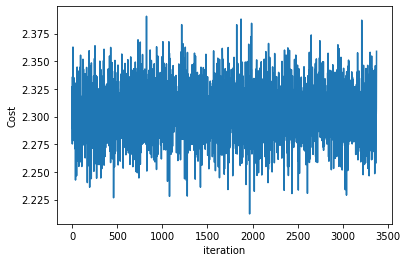

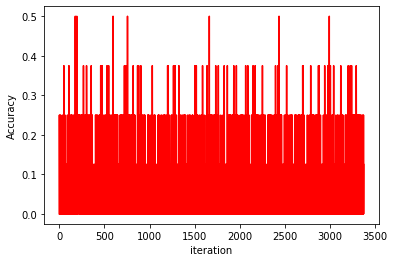

Computing accuracy over test set:
1.0% Completed
2.0% Completed
3.0% Completed
4.0% Completed
5.0% Completed
6.0% Completed
7.000000000000001% Completed
8.0% Completed
9.0% Completed
10.0% Completed
11.0% Completed
12.0% Completed
13.0% Completed
14.000000000000002% Completed
15.0% Completed
16.0% Completed
17.0% Completed
18.0% Completed
19.0% Completed
20.0% Completed
21.0% Completed
22.0% Completed
23.0% Completed
24.0% Completed
25.0% Completed
26.0% Completed
27.0% Completed
28.000000000000004% Completed
28.999999999999996% Completed
30.0% Completed
31.0% Completed
32.0% Completed
33.0% Completed
34.0% Completed
35.0% Completed
36.0% Completed
37.0% Completed
38.0% Completed
39.0% Completed
40.0% Completed
41.0% Completed
42.0% Completed
43.0% Completed
44.0% Completed
45.0% Completed
46.0% Completed
47.0% Completed
48.0% Completed
49.0% Completed
50.0% Completed
51.0% Completed
52.0% Completed
53.0% Completed
54.0% Completed
55.00000000000001% Completed
56.00000000000001% Complet

In [130]:
plt.figure(0)
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('iteration')
plt.figure(1)
plt.plot(acc, color='r')
plt.ylabel('Accuracy')
plt.xlabel('iteration')
plt.show()

X = test_data[:,0:-1]
X = X.reshape(len(test_data), IMG_DEPTH, IMG_WIDTH, IMG_WIDTH)
y = test_data[:,-1]
corr = 0
print("Computing accuracy over test set:")
for i in range(0,len(test_data)):
    image = X[i]
    label = np.zeros((theta3.shape[0],1))
    label[int(y[i]),0] = 1
    if predict(image, label, filt1, filt2, bias1, bias2, theta3, bias3)==y[i]:
        corr+=1
    if (i+1)%int(0.01*len(test_data))==0:
        print(str(float(i+1)/len(test_data)*100)+"% Completed")
test_acc = float(corr)/len(test_data)*100

In [131]:
test_acc=10*test_acc

In [132]:
print("Test Set Accuracy:"+str(test_acc)+" %")

Test Set Accuracy:82.00000000000001 %
